In [1]:
# Take ten colonies of Indore OR 10 cities of India of your choice. 
# Find out their longitude and lattitude through scraping.

import requests
from bs4 import BeautifulSoup

url = "https://www.latlong.net/place/indore-madhya-pradesh-india-2528.html"
page = requests.get(url)
plain_text = page.text
soup = BeautifulSoup(plain_text, "html.parser")
soup = soup.find_all('ul')[2]
loc = soup.find_all('a')
allLoc = []
latitude = []
longitude = []
for i in range(0,len(soup)-1):
    allLoc.append(str(loc[i].text))
for item in soup:
    if item == '\n':
        continue
    k = str(item).split("(")[-1].split(")")[0].split(",")
    latitude.append(float(k[0]))
    longitude.append(float(k[1]))
print (allLoc)
print (latitude)
print (longitude)


['Chittorgarh, Rajasthan, India', 'Ratnagiri, Maharashtra, India', 'Goregaon, Mumbai, Maharashtra, India', 'Pindwara, Rajasthan, India', 'Raipur, Chhattisgarh, India', 'Gokak, Karnataka, India', 'Lucknow, Uttar Pradesh, India', 'Delhi, the National Capital Territory of Delhi, India', 'Mumbai, Maharashtra, India', 'Sagar, Karnataka, India']
[24.879999, 16.994444, 19.155001, 24.7945, 21.25, 16.1667, 26.85, 28.610001, 19.07609, 14.16704]
[74.629997, 73.300003, 72.849998, 73.055, 81.629997, 74.833298, 80.949997, 77.230003, 72.877426, 75.040298]


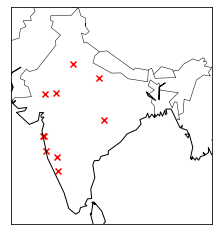

In [2]:
#  Visualize the above 10 points on a 2D map of India

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

m = Basemap(llcrnrlon=68.1,
            llcrnrlat=6.6,
            urcrnrlon=97.4,
            urcrnrlat=35.7,
            lat_0=54.5,
            lon_0=-4.36,
            projection='merc',
            resolution = 'c',
            area_thresh=10000.,
            )
# m.drawmapboundary(fill_color='aqua')
# m.fillcontinents(color='coral',lake_color='aqua')
m.drawcoastlines()
m.drawcountries()
m.drawstates()

for i in range(0,len(latitude)):
    lons, lats = m(longitude[i],latitude[i])
    # plot points as red dots
    m.scatter(lons,lats, marker = 'x', color='r')
m